<a href="https://colab.research.google.com/github/joshuabusinge/VaccinationRatesAnalysis/blob/main/VaccinationRateAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **VACCINATION RATES ANALYSIS PROJECT**

Step 1: Import Required Libraries
Start by importing the necessary libraries for data analysis and visualization.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


Step 2: Data Retrieval and Preparation
Access the dataset through the CSV file and extract the relevant information. Perform data cleaning and preprocessing to ensure data quality.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# read data and convert the data into a pandas DataFrame
vaccination_df = pd.read_csv('/content/drive/MyDrive/Dalberg/Data Fellow Assignment/e2bcc139-4c7a-4096-945b-912a0f8b5385.csv')
# Explore the data to gain initial insights
vaccination_df.head()

,_id,State,Vaccine,Total
0,1,Abia,Any,95.5
1,2,Abia,Measles,86.4
2,3,Abia,Penta 1,95.5
3,4,Abia,Penta 2,90.9
4,5,Abia,Penta 3,86.4


In [ ]:
#Intial Rows and Columns of the data
vaccination_df.shape

(190, 4)

In [ ]:
# read data and convert the data into a pandas DataFrame
population_df = pd.read_csv('/content/drive/MyDrive/Dalberg/Data Fellow Assignment/nigeria-total-population-vs-vaccinated.csv')
# Explore the data to gain initial insights
population_df.head()

,Region,State,Total population
0,South East,Abia,"3,727,347"
1,North East,Adamawa,"4,248,436"
2,South South,Akwa Ibom,"5,482,177"
3,South East,Anambra,"5,527,809"
4,North East,Bauchi,"6,537,314"


In [ ]:
#convert the Total population from object data type to int64
population_df['Total population'] = population_df['Total population'].str.replace(',', '').astype('int64')
population_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Region            37 non-null     object
 1   State             37 non-null     object
 2   Total population  37 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1016.0+ bytes


In [ ]:
#Intial Rows and Columns of the data
population_df.shape

(37, 3)

In [ ]:
missing_values = population_df.isnull().sum()
print(missing_values)

Region              0
State               0
Total population    0
dtype: int64


In [ ]:
# Merge the two DataFrames
merged_data = vaccination_df.merge(population_df, on='State', how='outer')
# Print the merged data
merged_data.head(20)

,_id,State,Vaccine,Total,Region,Total population
0,1.0,Abia,Any,95.5,South East,3727347.0
1,2.0,Abia,Measles,86.4,South East,3727347.0
2,3.0,Abia,Penta 1,95.5,South East,3727347.0
3,4.0,Abia,Penta 2,90.9,South East,3727347.0
4,5.0,Abia,Penta 3,86.4,South East,3727347.0
5,6.0,Adamawa,Any,83.5,North East,4248436.0
6,7.0,Adamawa,Measles,68.4,North East,4248436.0
7,8.0,Adamawa,Penta 1,69.9,North East,4248436.0
8,9.0,Adamawa,Penta 2,63.2,North East,4248436.0
9,10.0,Adamawa,Penta 3,51.9,North East,4248436.0


In [ ]:
region_vaccination_rates = merged_data.groupby('Region')['Total'].mean()
print(region_vaccination_rates)

Region
North Central    63.148000
North East       61.740000
North West       38.431429
South East       88.104000
South South      78.940000
South West       84.043333
Name: Total, dtype: float64


Step 3: Data Analysis
Conduct exploratory data analysis (EDA) to gain a comprehensive understanding of the vaccination rates.

In [ ]:
merged_data.duplicated().sum()

0

In [ ]:
missing_values = merged_data.isnull().sum()
print(missing_values)

_id                  2
State                0
Vaccine              2
Total                2
Region              15
Total population    15
dtype: int64


In [ ]:
# Calculate the mean, median, and standard deviation of vaccination rates for each vaccine type
vaccine_types = ['Any', 'Measles', 'Penta 1', 'Penta 2', 'Penta 3']
for vaccine_type in vaccine_types:
    mean_vaccination_rate = merged_data.loc[merged_data['Vaccine'] == vaccine_type, 'Total'].mean()
    median_vaccination_rate = merged_data.loc[merged_data['Vaccine'] == vaccine_type, 'Total'].median()
    std_vaccination_rate = merged_data.loc[merged_data['Vaccine'] == vaccine_type, 'Total'].std()
    print(f"Descriptive statistics for {vaccine_type}:")
    print(f"Mean: {mean_vaccination_rate:.2f}")
    print(f"Median: {median_vaccination_rate:.2f}")
    print(f"Standard Deviation: {std_vaccination_rate:.2f}")
    print()

# Calculate the mean, median, and standard deviation of vaccination rates for each region
grouped_by_region = merged_data.groupby('Region')
for region, group in grouped_by_region:
    mean_vaccination_rate = group['Total'].mean()
    median_vaccination_rate = group['Total'].median()
    std_vaccination_rate = group['Total'].std()
    print(f"Descriptive statistics for {region}:")
    print(f"Mean: {mean_vaccination_rate:.2f}")
    print(f"Median: {median_vaccination_rate:.2f}")
    print(f"Standard Deviation: {std_vaccination_rate:.2f}")
    print()

Descriptive statistics for Any:
Mean: 80.45
Median: 83.55
Standard Deviation: 17.12

Descriptive statistics for Measles:
Mean: 65.58
Median: 68.20
Standard Deviation: 19.43

Descriptive statistics for Penta 1:
Mean: 71.30
Median: 73.55
Standard Deviation: 20.78

Descriptive statistics for Penta 2:
Mean: 66.84
Median: 68.35
Standard Deviation: 22.03

Descriptive statistics for Penta 3:
Mean: 58.12
Median: 56.60
Standard Deviation: 22.64

Descriptive statistics for North Central:
Mean: 63.15
Median: 63.10
Standard Deviation: 14.46

Descriptive statistics for North East:
Mean: 61.74
Median: 63.10
Standard Deviation: 10.37

Descriptive statistics for North West:
Mean: 38.43
Median: 35.40
Standard Deviation: 18.89

Descriptive statistics for South East:
Mean: 88.10
Median: 88.10
Standard Deviation: 6.77

Descriptive statistics for South South:
Mean: 78.94
Median: 81.25
Standard Deviation: 13.48

Descriptive statistics for South West:
Mean: 84.04
Median: 88.50
Standard Deviation: 13.02



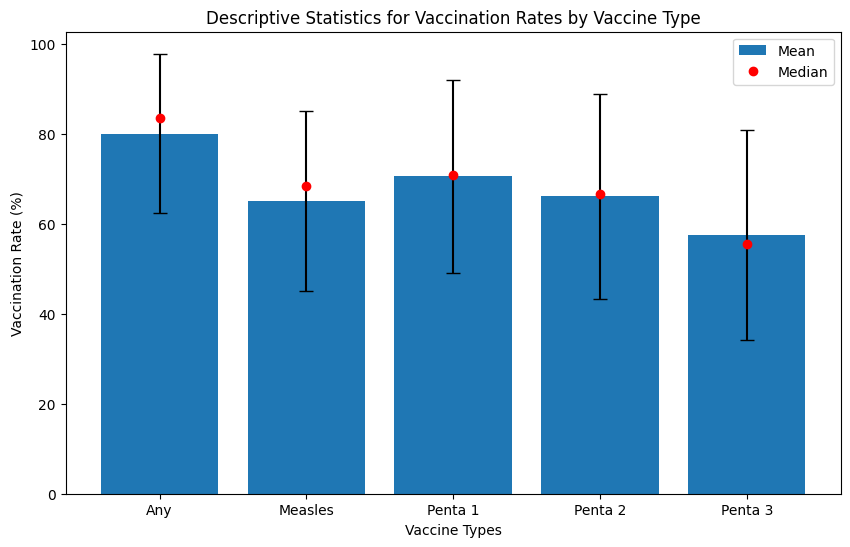

In [ ]:
# Define the vaccine types and their descriptive statistics
vaccine_types = ['Any', 'Measles', 'Penta 1', 'Penta 2', 'Penta 3']
mean_vaccination_rates = [80.02, 64.99, 70.55, 66.04, 57.49]
median_vaccination_rates = [83.50, 68.40, 70.80, 66.70, 55.40]
std_vaccination_rates = [17.74, 19.97, 21.40, 22.67, 23.29]

# Create a bar plot with error bars for mean, median, and standard deviation
plt.figure(figsize=(10, 6))
plt.bar(vaccine_types, mean_vaccination_rates, yerr=std_vaccination_rates, capsize=5, label='Mean')
plt.errorbar(vaccine_types, median_vaccination_rates, fmt='o', color='red', label='Median')
plt.xlabel('Vaccine Types')
plt.ylabel('Vaccination Rate (%)')
plt.title('Descriptive Statistics for Vaccination Rates by Vaccine Type')
plt.legend()

# Save the plot as a PDF file
plt.savefig('vaccination_rates_vaccine.pdf', format='pdf')

#Display the plot
plt.show()


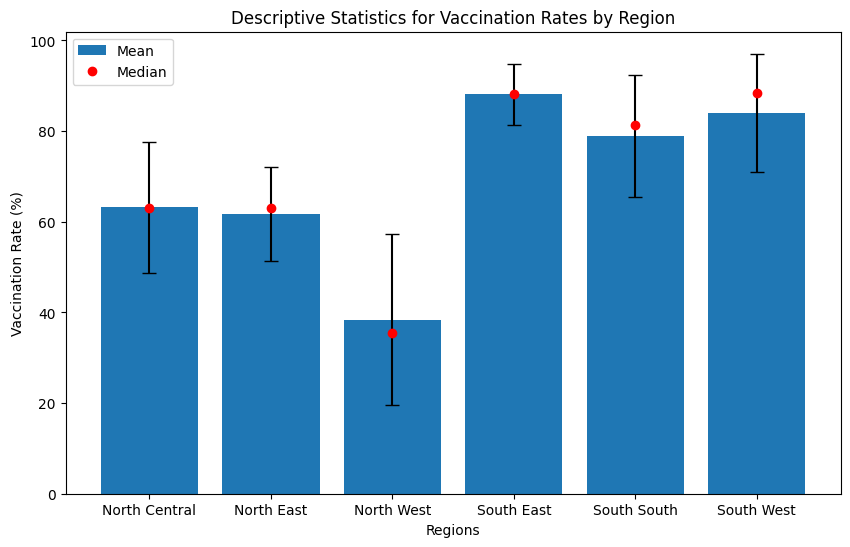

In [ ]:
# Define the regions and their descriptive statistics
regions = ['North Central', 'North East', 'North West', 'South East', 'South South', 'South West']
mean_vaccination_rates = [63.15, 61.74, 38.43, 88.10, 78.94, 84.04]
median_vaccination_rates = [63.10, 63.10, 35.40, 88.10, 81.25, 88.50]
std_vaccination_rates = [14.46, 10.37, 18.89, 6.77, 13.48, 13.02]

# Create a bar plot with error bars for mean, median, and standard deviation by region
plt.figure(figsize=(10, 6))
plt.bar(regions, mean_vaccination_rates, yerr=std_vaccination_rates, capsize=5, label='Mean')
plt.errorbar(regions, median_vaccination_rates, fmt='o', color='red', label='Median')
plt.xlabel('Regions')
plt.ylabel('Vaccination Rate (%)')
plt.title('Descriptive Statistics for Vaccination Rates by Region')
plt.legend()

# Save the plot as a PDF file
plt.savefig('vaccination_rates_region.pdf', format='pdf')

#Display the plot
plt.show()


In [ ]:
# Group the data by states and calculate the average vaccination rates
state_vaccination_rates = merged_data.groupby('State')['Total'].mean()

# Print the average vaccination rates for each state
print(state_vaccination_rates)

State
Abia                         90.94
Adamawa                      67.38
Akwa Ibom                    75.06
Anambra                      86.32
Bauchi                       52.60
Bayelsa                      56.68
Benue                        60.62
Borno                        56.68
Cross River                  84.48
Delta                        82.20
Ebonyi                       84.76
Edo                          89.70
Ekiti                        95.08
Enugu                        86.44
FCT                            NaN
Federal Capital Territory    85.62
Gombe                        59.64
Imo                          92.06
Jigawa                       55.18
Kaduna                       60.64
Kano                         50.22
Katsina                      21.92
Kebbi                        30.10
Kogi                         66.96
Kwara                        58.80
Lagos                        94.70
Nasarawa                     74.82
Nassarawa                      NaN
Niger         

In [ ]:
# Group the data by vaccine types and calculate the average vaccination rates
vaccine_type_vaccination_rates = merged_data.groupby('Vaccine')['Total'].mean()

# Print the average vaccination rates for each vaccine type
print(vaccine_type_vaccination_rates)


Vaccine
Any        80.450000
Measles    65.578947
Penta 1    71.297368
Penta 2    66.839474
Penta 3    58.118421
Name: Total, dtype: float64


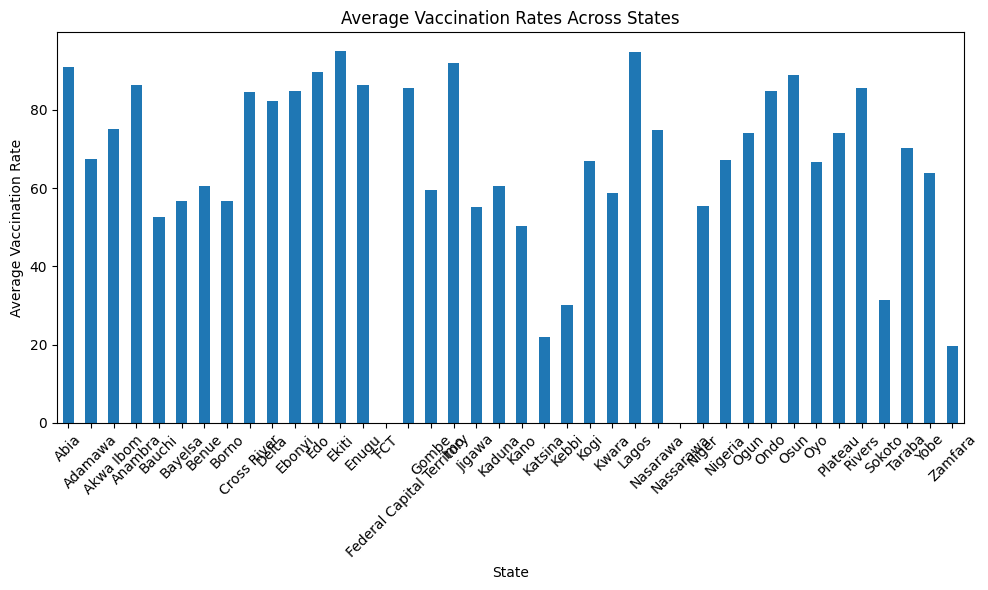

In [ ]:
# Group the data by states and calculate the average vaccination rates
state_vaccination_rates = merged_data.groupby('State')['Total'].mean()

# Create a bar chart for average vaccination rates across states
plt.figure(figsize=(10, 6))
state_vaccination_rates.plot(kind='bar')
plt.xlabel('State')
plt.ylabel('Average Vaccination Rate')
plt.title('Average Vaccination Rates Across States')
plt.xticks(rotation=45)
plt.tight_layout()

# Save the plot as a PDF file
plt.savefig('avg_vaccination_rates_states.pdf', format='pdf')

#Display the plot
plt.show()

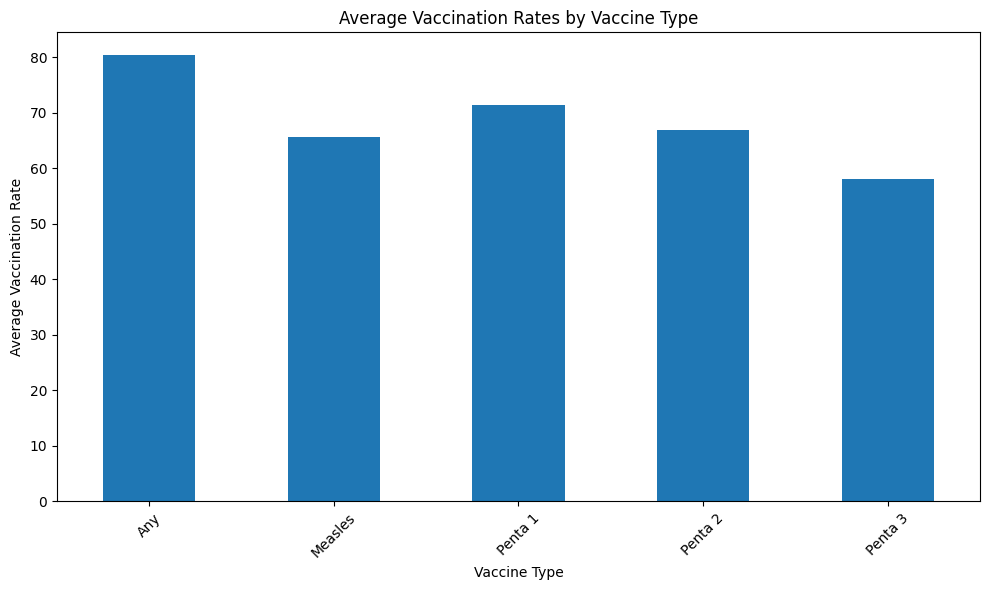

In [ ]:
# Group the data by vaccine types and calculate the average vaccination rates
vaccine_type_vaccination_rates = merged_data.groupby('Vaccine')['Total'].mean()

# Create a bar chart for average vaccination rates based on vaccine types
plt.figure(figsize=(10, 6))
vaccine_type_vaccination_rates.plot(kind='bar')
plt.xlabel('Vaccine Type')
plt.ylabel('Average Vaccination Rate')
plt.title('Average Vaccination Rates by Vaccine Type')
plt.xticks(rotation=45)
plt.tight_layout()
# Save the plot as a PDF file
plt.savefig('avg_vaccination_rates_vaccine.pdf', format='pdf')

#Display the plot
plt.show()


Step 4: Visualization and Insights
Create informative visualizations, such as bar charts, box plots, and histogram, to represent the vaccination rates and associated insights effectively.

In [ ]:
# Select the relevant columns for correlation analysis
columns_of_interest = ['Vaccine', 'Total population', 'Total']

# Subset the DataFrame with the selected columns
subset_df = merged_data[columns_of_interest]

# Calculate the correlation matrix
correlation_matrix = subset_df.corr()

# Print the correlation matrix
print(correlation_matrix)


                  Total population     Total
Total population          1.000000 -0.101049
Total                    -0.101049  1.000000


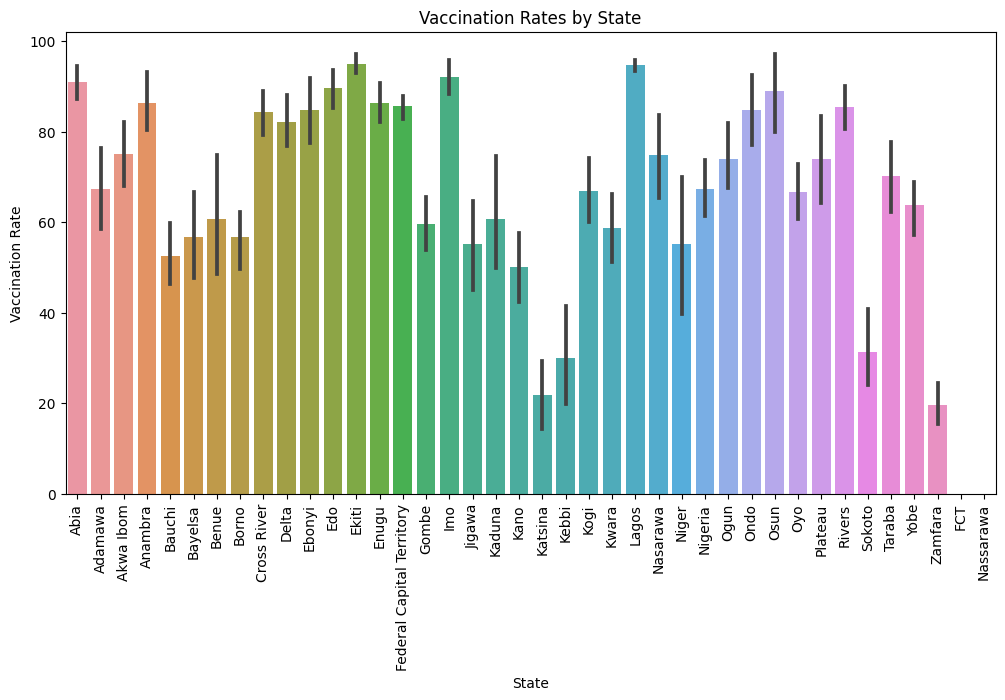

In [ ]:
# Perform data visualizations using plots
# Bar plot of vaccination rates by state
plt.figure(figsize=(12, 6))
sns.barplot(x='State', y='Total', data=merged_data)
plt.title('Vaccination Rates by State')
plt.xlabel('State')
plt.ylabel('Vaccination Rate')
plt.xticks(rotation=90)
plt.show()

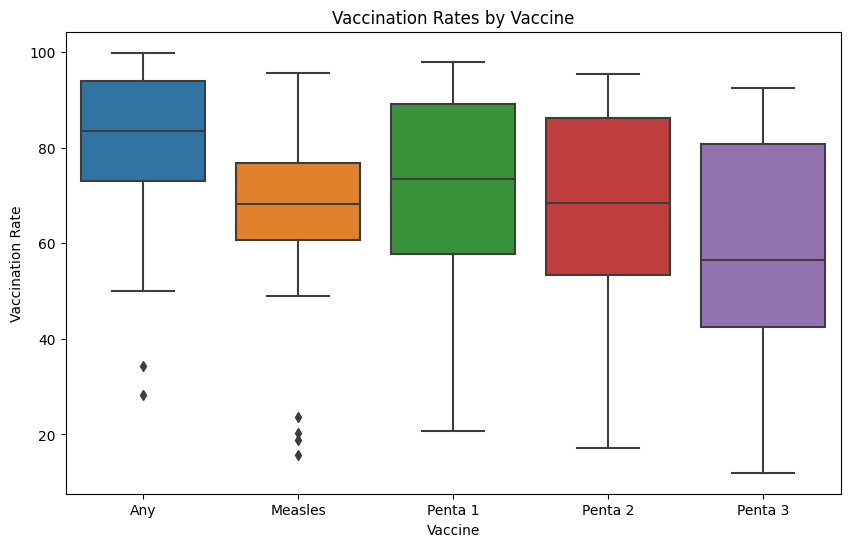

In [ ]:
# Box plot of vaccination rates by vaccine
plt.figure(figsize=(10, 6))
sns.boxplot(x='Vaccine', y='Total', data=merged_data)
plt.title('Vaccination Rates by Vaccine')
plt.xlabel('Vaccine')
plt.ylabel('Vaccination Rate')
plt.show()

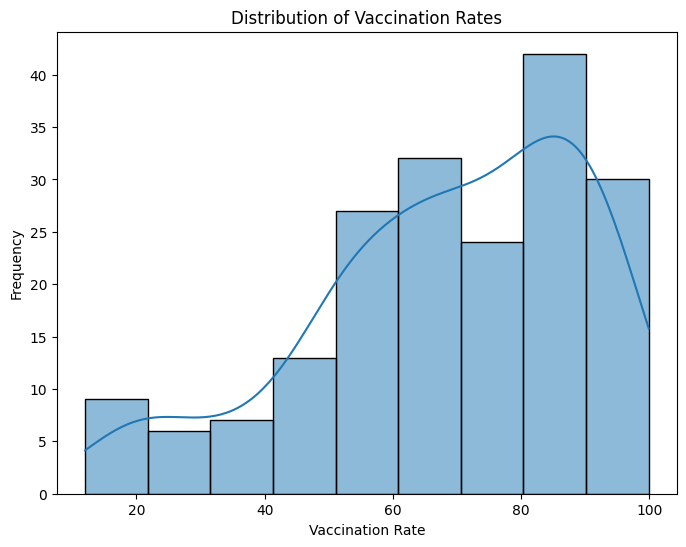

In [ ]:
# Histogram of vaccination rates
plt.figure(figsize=(8, 6))
sns.histplot(merged_data['Total'], kde=True)
plt.title('Distribution of Vaccination Rates')
plt.xlabel('Vaccination Rate')
plt.ylabel('Frequency')
plt.show()

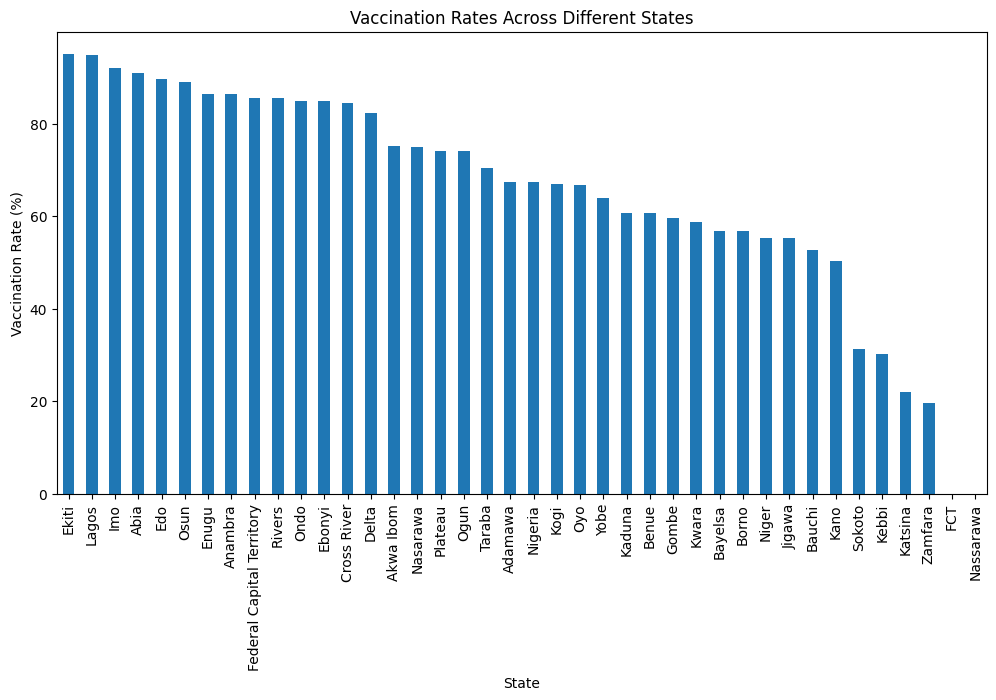

In [ ]:
# Using data stored in a pandas DataFrame called 'data'
state_vaccination = merged_data.groupby('State')['Total'].mean().sort_values(ascending=False)

# Plotting the vaccination rates for each state
plt.figure(figsize=(12, 6))
state_vaccination.plot(kind='bar')
plt.xlabel('State')
plt.ylabel('Vaccination Rate (%)')
plt.title('Vaccination Rates Across Different States')
plt.xticks(rotation=90)
plt.show()

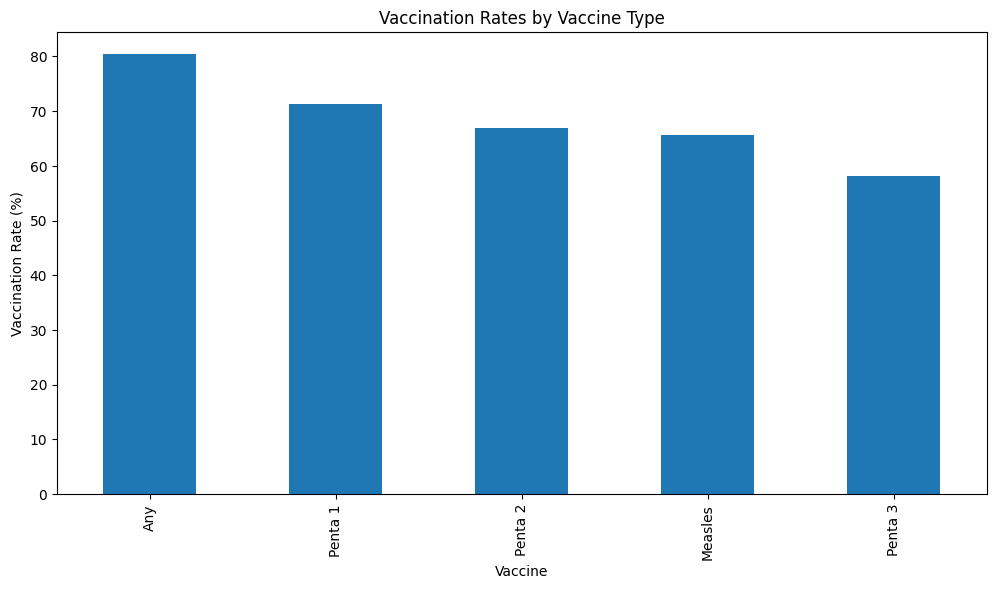

In [ ]:
# Using data stored in a pandas DataFrame called 'data'
vaccine_vaccination = merged_data.groupby('Vaccine')['Total'].mean().sort_values(ascending=False)

# Plotting the vaccination rates for each vaccine category
plt.figure(figsize=(12, 6))
vaccine_vaccination.plot(kind='bar')
plt.xlabel('Vaccine')
plt.ylabel('Vaccination Rate (%)')
plt.title('Vaccination Rates by Vaccine Type')
plt.xticks(rotation=90)
plt.show()

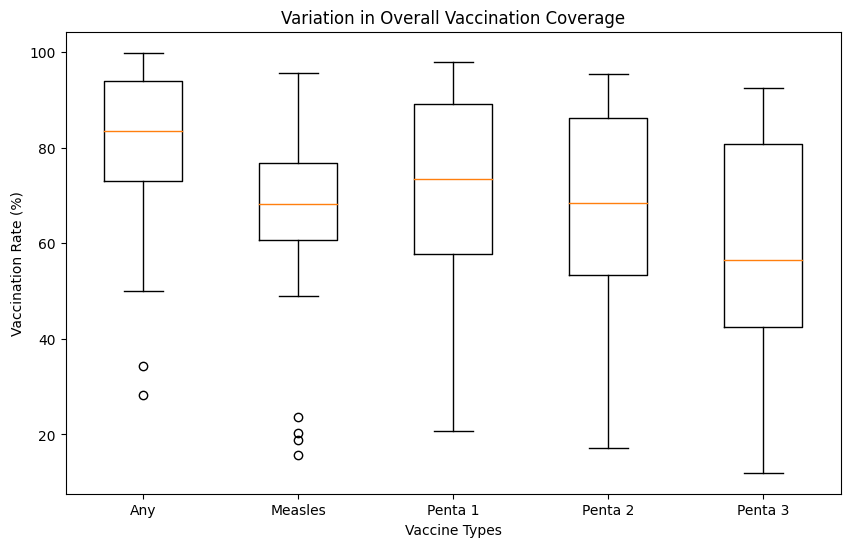

In [ ]:
# Using data stored in a pandas DataFrame called 'data'
vaccine_categories = ['Any', 'Measles', 'Penta 1', 'Penta 2', 'Penta 3']
vaccine_coverage = []

# Extract vaccination rates for each category
for category in vaccine_categories:
    coverage = merged_data[merged_data['Vaccine'] == category]['Total']
    vaccine_coverage.append(coverage)

# # Summary statistics
# print("Overall Vaccination Coverage:")
# print(overall_coverage.describe())

# Box plot to visualize the variation
plt.figure(figsize=(10, 6))
plt.boxplot(vaccine_coverage, labels=vaccine_categories)
plt.ylabel('Vaccination Rate (%)')
plt.xlabel('Vaccine Types')
plt.title('Variation in Overall Vaccination Coverage')
# Save the plot as a PDF file
plt.savefig('boxplot_vaccination_coverage.pdf', format='pdf')

#Display the plot
plt.show()


In [ ]:
# Group the data by the "Region" column
grouped_data = merged_data.groupby('Region')

# Print the groups
for region, group in grouped_data:
    print(f"Region: {region}")
    print(group)
    print()

Region: North Central
       _id      State  Vaccine  Total         Region  Total population
30    31.0      Benue      Any   84.4  North Central         5741815.0
31    32.0      Benue  Measles   60.4  North Central         5741815.0
32    33.0      Benue  Penta 1   62.5  North Central         5741815.0
33    34.0      Benue  Penta 2   55.2  North Central         5741815.0
34    35.0      Benue  Penta 3   40.6  North Central         5741815.0
110  111.0       Kogi      Any   79.2  North Central         4473490.0
111  112.0       Kogi  Measles   70.8  North Central         4473490.0
112  113.0       Kogi  Penta 1   66.7  North Central         4473490.0
113  114.0       Kogi  Penta 2   65.3  North Central         4473490.0
114  115.0       Kogi  Penta 3   52.8  North Central         4473490.0
115  116.0      Kwara      Any   73.8  North Central         3192893.0
116  117.0      Kwara  Measles   63.1  North Central         3192893.0
117  118.0      Kwara  Penta 1   57.1  North Central   

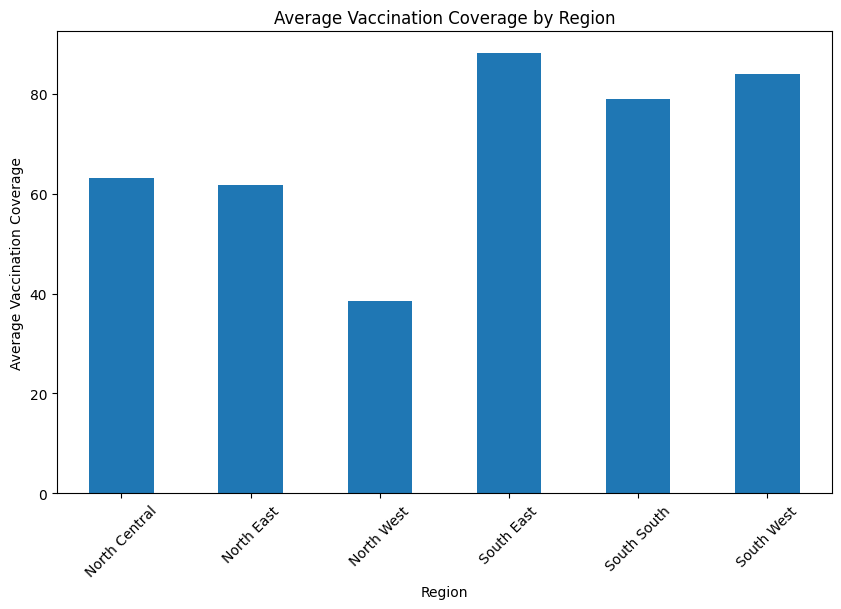

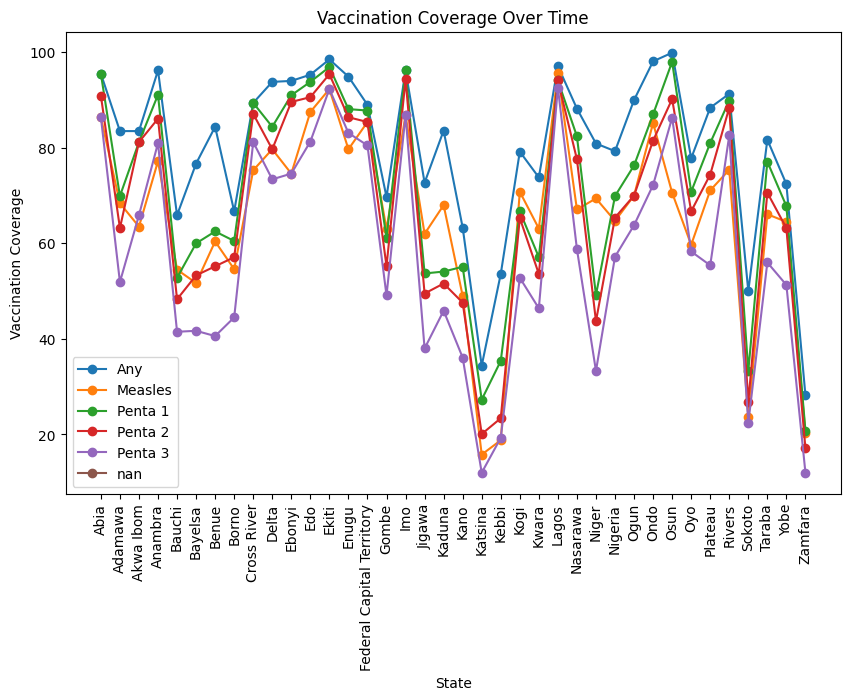

In [ ]:
# Bar chart - Average vaccination coverage by region
region_avg_vaccination = merged_data.groupby('Region')['Total'].mean()
plt.figure(figsize=(10, 6))
region_avg_vaccination.plot(kind='bar')
plt.title('Average Vaccination Coverage by Region')
plt.xlabel('Region')
plt.ylabel('Average Vaccination Coverage')
plt.xticks(rotation=45)
plt.show()

# Line graph - Vaccination coverage over time
vaccine_types = merged_data['Vaccine'].unique()
plt.figure(figsize=(10, 6))
for vaccine_type in vaccine_types:
    vaccine_data = merged_data[merged_data['Vaccine'] == vaccine_type]
    plt.plot(vaccine_data['State'], vaccine_data['Total'], marker='o', label=vaccine_type)
plt.title('Vaccination Coverage Over Time')
plt.xlabel('State')
plt.ylabel('Vaccination Coverage')
plt.legend()
plt.xticks(rotation=90)
plt.show()



In [ ]:
# Calculate the total vaccination received by region
region_vaccination = merged_data.groupby('Region')['Total'].sum()

# Calculate the total population by region
region_population = merged_data.groupby('Region')['Total population'].sum()

# Create a new DataFrame combining the total vaccination and population by region
region_data = pd.DataFrame({'Vaccination': region_vaccination, 'Population': region_population})
region_data.head()

,Vaccination,Population
Region,,
North Central,1578.7,121911956.0
North East,1852.2,131319330.0
North West,1345.1,254711535.0
South East,2202.6,109777070.0
South South,2368.2,144146440.0


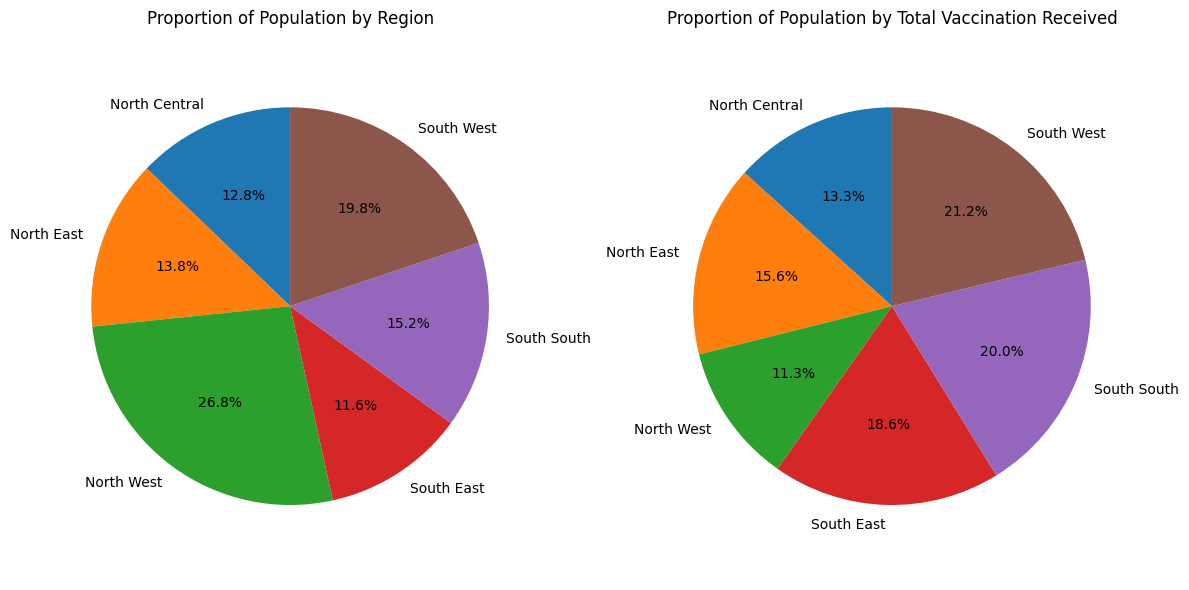

In [ ]:
# Calculate the total vaccination received by region
region_vaccination = merged_data.groupby('Region')['Total'].sum()

# Calculate the total population by region
region_population = merged_data.groupby('Region')['Total population'].sum()

# Create a new DataFrame combining the total vaccination and population by region
region_data = pd.DataFrame({'Vaccination': region_vaccination, 'Population': region_population})

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot the pie chart - Proportion of population by region
axs[0].pie(region_population, labels=region_population.index, autopct='%1.1f%%', startangle=90)
axs[0].set_title('Proportion of Population by Region')
axs[0].axis('equal')

# Plot the pie chart - Proportion of population by total vaccination received
axs[1].pie(region_data['Vaccination'], labels=region_data.index, autopct='%1.1f%%', startangle=90)
axs[1].set_title('Proportion of Population by Total Vaccination Received')
axs[1].axis('equal')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the chart
plt.savefig('population_vs_vaccination.pdf', format='pdf')

#Display the plot
plt.show()


Step 5: Recommendations
Provide actionable recommendations based on the insights derived from the data analysis. Suggest strategies and interventions to enhance vaccination rates in specific regions or for specific vaccines.

In [ ]:
#Perform Statistical Analysis
# Calculate the mean vaccination rate
mean_vaccination_rate = merged_data['Total'].mean()
print('Mean Vaccination Rate:', mean_vaccination_rate)

# Example 1: Calculate the highest and lowest vaccination rates by state
highest_vaccination_state = merged_data.loc[merged_data['Total'].idxmax(), 'State']
lowest_vaccination_state = merged_data.loc[merged_data['Total'].idxmin(), 'State']
print('State with Highest Vaccination Rate:', highest_vaccination_state)
print('State with Lowest Vaccination Rate:', lowest_vaccination_state)

# Calculate correlation between variables
correlation = merged_data.corr()
print('Correlation Matrix:')
print(correlation)


Mean Vaccination Rate: 68.45684210526316
State with Highest Vaccination Rate: Osun
State with Lowest Vaccination Rate: Katsina
Correlation Matrix:
                       _id     Total  Total population
_id               1.000000 -0.233128          0.091037
Total            -0.233128  1.000000         -0.101049
Total population  0.091037 -0.101049          1.000000


In [ ]:
# Example 2: Calculate highest and lowest vaccination rates by state
highest_rates = merged_data.groupby('State')['Vaccine','Total'].max()
lowest_rates = merged_data.groupby('State')['Vaccine','Total','Region'].min()

# Display the results
print("Highest Vaccination Rates by State:")
print(highest_rates)

print("Lowest Vaccination Rates by State:")
print(lowest_rates)

Highest Vaccination Rates by State:
                           Vaccine  Total
State                                    
Abia                       Penta 3   95.5
Adamawa                    Penta 3   83.5
Akwa Ibom                  Penta 3   83.5
Anambra                    Penta 3   96.2
Bauchi                     Penta 3   65.9
Bayelsa                    Penta 3   76.7
Benue                      Penta 3   84.4
Borno                      Penta 3   66.7
Cross River                Penta 3   89.4
Delta                      Penta 3   93.8
Ebonyi                     Penta 3   94.0
Edo                        Penta 3   95.3
Ekiti                      Penta 3   98.5
Enugu                      Penta 3   94.9
FCT                            NaN    NaN
Federal Capital Territory  Penta 3   89.0
Gombe                      Penta 3   69.7
Imo                        Penta 3   96.2
Jigawa                     Penta 3   72.7
Kaduna                     Penta 3   83.6
Kano                       Penta 3   63.

In [ ]:
# Provide recommendations based on the analysis
# ...

# Example: Recommend targeted vaccination campaigns in states with low rates
low_rate_states = merged_data[merged_data['Total'] < 50]['State'].unique()
print("Recommendation: Targeted vaccination campaigns in states with low rates:")
print(low_rate_states)


Recommendation: Targeted vaccination campaigns in states with low rates:
['Bauchi' 'Bayelsa' 'Benue' 'Borno' 'Gombe' 'Jigawa' 'Kaduna' 'Kano'
 'Katsina' 'Kebbi' 'Kwara' 'Niger' 'Sokoto' 'Zamfara']


In [ ]:
# Sort the dataset by the 'Total' column in ascending order
sorted_data = merged_data.sort_values('Total')

# Select the rows with the minimum 'Total' value
min_total_data = sorted_data[sorted_data['Total'] == sorted_data['Total'].min()]

# Extract the 'State', 'Region', and 'Vaccine' columns from the min_total_data
states_regions_vaccines = min_total_data[['State', 'Region', 'Vaccine','Total']]

# Print the states, regions, and vaccines with the least total
print(states_regions_vaccines)

       State      Region  Vaccine  Total
189  Zamfara  North West  Penta 3   12.0
104  Katsina  North West  Penta 3   12.0


In [ ]:
# Filter the merged dataset for high-population regions with low total vaccine count
filtered_data = merged_data[(merged_data['Total population'] > 10000000) & (merged_data['Total'] < 50)]

# Display the filtered dataset
print(filtered_data[['Region', 'State', 'Vaccine', 'Total','Total population']])


        Region State  Vaccine  Total  Total population
96  North West  Kano  Measles   49.0        15076892.0
98  North West  Kano  Penta 2   47.6        15076892.0
99  North West  Kano  Penta 3   36.1        15076892.0


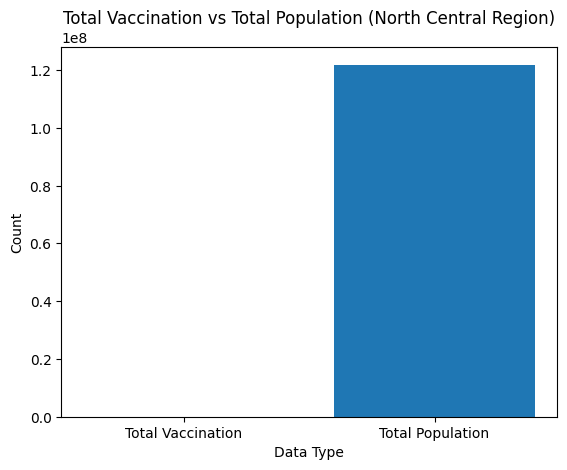

In [ ]:
# Filter the merged data for the North Central region
north_central_data = merged_data[merged_data['Region'] == 'North Central']

# Get the total vaccination and total population for the North Central region
total_vaccination = north_central_data['Total'].sum()
total_population = north_central_data['Total population'].sum()

# Create a bar chart to visualize the data
plt.bar(['Total Vaccination', 'Total Population'], [total_vaccination, total_population])
plt.xlabel('Data Type')
plt.ylabel('Count')
plt.title('Total Vaccination vs Total Population (North Central Region)')
plt.show()


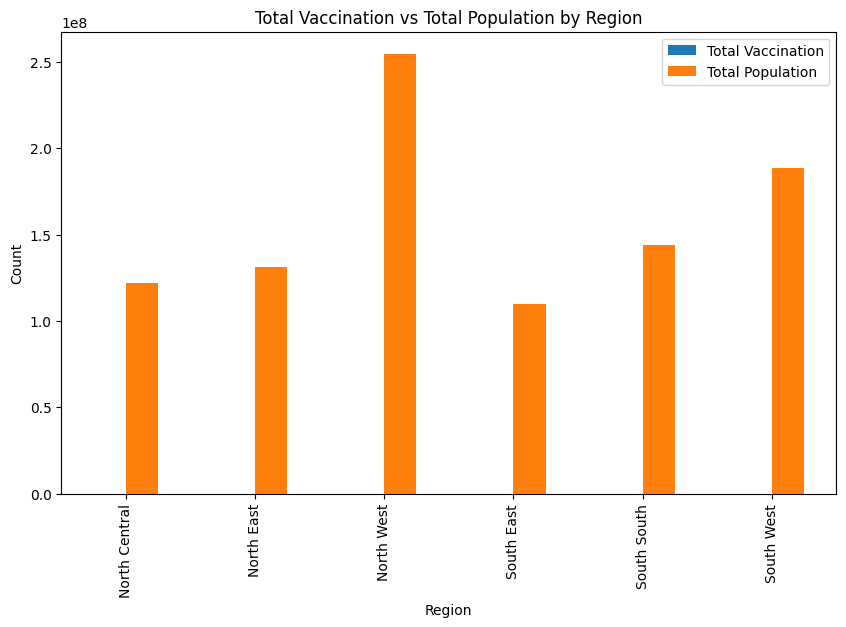

In [ ]:
# Group the merged data by region and calculate the sum of total vaccination and total population
region_data = merged_data.groupby('Region').agg({'Total': 'sum', 'Total population': 'sum'})

# Create a bar chart to visualize the data
region_data.plot(kind='bar', y=['Total', 'Total population'], figsize=(10, 6))
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Total Vaccination vs Total Population by Region')
plt.legend(['Total Vaccination', 'Total Population'])
plt.show()


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Scale the 'Total' and 'Total population' columns
scaled_data = merged_data[['Total', 'Total population']].copy()
scaled_data[['Total', 'Total population']] = scaler.fit_transform(scaled_data[['Total', 'Total population']])

# Print the scaled data
print(scaled_data)


        Total  Total population
0    0.949943          0.113243
1    0.846416          0.113243
2    0.949943          0.113243
3    0.897611          0.113243
4    0.846416          0.113243
..        ...               ...
187  0.100114          0.174817
188  0.058020          0.174817
189  0.000000          0.174817
190       NaN          0.100490
191       NaN          0.019176

[192 rows x 2 columns]


In [ ]:
# Display the scaled data for all regions
scaled_data['Region'] = merged_data['Region']
print(scaled_data)


        Total  Total population         Region
0    0.949943          0.113243     South East
1    0.846416          0.113243     South East
2    0.949943          0.113243     South East
3    0.897611          0.113243     South East
4    0.846416          0.113243     South East
..        ...               ...            ...
187  0.100114          0.174817     North West
188  0.058020          0.174817     North West
189  0.000000          0.174817     North West
190       NaN          0.100490  North Central
191       NaN          0.019176  North Central

[192 rows x 3 columns]
